In [70]:
pwd

'/home/scli/YBe'

In [1]:
import numpy as np
from numba import njit
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as mdates
from matplotlib.colors import LogNorm, Normalize
import pandas as pd
import pickle
from datetime import datetime
import strax
import straxen
import cutax
from tqdm.notebook import tqdm, trange
strax.utils.tqdm = tqdm
from multihist import Hist1d, Histdd

import copy
from matplotlib import cm


In [2]:
params = {
    'font.family': 'serif',
    'font.size' : 24, 'axes.titlesize' : 42, 'axes.labelsize' : 32, 'axes.linewidth' : 2,
    # ticks
    'xtick.labelsize' : 24, 'ytick.labelsize' : 24, 'xtick.major.size' : 18, 'xtick.minor.size' : 8,
    'ytick.major.size' : 18, 'ytick.minor.size' : 8, 'xtick.major.width' : 2, 'xtick.minor.width' : 2,
    'ytick.major.width' : 2, 'ytick.minor.width' : 2, 'xtick.direction' : 'in', 'ytick.direction' : 'in',
    # markers
    'lines.markersize' : 8, 'lines.markeredgewidth' : 2, 'errorbar.capsize' : 5, 'lines.linewidth' : 2,
    #'lines.linestyle' : None, 'lines.marker' : None,
    'savefig.bbox' : 'tight', 'legend.fontsize' : 24,
    'axes.labelsize': 30, 'axes.titlesize':24, 'xtick.labelsize':24, 'ytick.labelsize':24,
    'backend': 'Agg', 'mathtext.fontset': 'dejavuserif',
    'figure.facecolor':'w',
    #pad
    'axes.labelpad':20,
    # ticks
    'xtick.major.pad': 7,   'xtick.minor.pad': 7,   
    'ytick.major.pad': 4, 'ytick.minor.pad': 4,
}
plt.rcParams.update(params)

In [2]:
rn220 = pd.read_hdf('/project2/lgrandi/jingqiang/xenonnt_sr0/calibration/rn220/nt_sr0_rn220_runs_cmtv7_tag20220305.hdf', 'table')
rn220_clean = rn220.query('cuts_rn220 and cs1<200')

In [3]:
straxen.print_versions()

,module,version,path,git
0,python,3.8.13,/opt/XENONnT/anaconda/envs/XENONnT_2022.09.1/b...,None
1,strax,1.2.3,/opt/XENONnT/anaconda/envs/XENONnT_2022.09.1/l...,None
2,straxen,1.8.3,/opt/XENONnT/anaconda/envs/XENONnT_2022.09.1/l...,None
3,cutax,1.13.0,/dali/lgrandi/xenonnt/software/cutax/v1.13.0/c...,None


In [3]:
st = cutax.xenonnt_online(
    output_folder='/dali/lgrandi/scli/strax_data',
    # include_online_monitor=True,
    include_rucio_local=True,
    # download_heavy=True
)

In [69]:
runs_all = st.select_runs(
    # include_tags='sr0_preliminary', 
    exclude_tags=(
        'ramp_up',
        'messy',
        'bad',
        'abandon',
        'hot_spot'
    ),
    run_mode=[
        'ybe_linked'
    ]
)

# exclude_runs = ['039414', '039420', '039426']

# runs_all = runs_all.query('peak_basics_available == True and not name in @exclude_runs')
#runs_all = runs_all.query('peak_basics_available == True')

Checking data availability:   0%|          | 0/2 [00:00<?, ?it/s]

In [69]:
runs_all=runs_all[runs_all.number>47709]
print('total hour:',np.sum(runs_all.livetime)/np.timedelta64(1, 'h'))

total hour: 200.58111222222223


In [6]:
targets = (
    'event_info',
    'cut_cs2_area_fraction_top',
    'cut_main_is_valid_triggering_peak',
    'cut_interaction_exists',
    'cut_run_boundaries',
    'cut_s1_max_pmt',
    'cut_s1_width',
    'cut_s2_recon_pos_diff',
    'cut_s2_single_scatter',
    'cut_s1_tightcoin_3fold',
    'cut_fiducial_volume',
    'cut_bdt_ac',
    'cut_s2_width_wire_modeled_wimps',
    'cut_s2_pattern',
    'cut_s1_single_scatter',
    'cut_s1_pattern_top',
    'cut_s1_area_fraction_top',
    'cut_s1_pattern_bottom',
    'cut_s1_naive_bayes',
    'cut_s2_naive_bayes',
    'cut_daq_veto',
    'cut_time_veto',
    'cut_s1_tightcoin_3fold',
    
)

In [7]:
target_less = ('event_info',
                'cut_cs2_area_fraction_top',
                'cut_daq_veto',
                'cut_main_is_valid_triggering_peak',
                'cut_interaction_exists',
                'cut_run_boundaries',
                'cut_s1_area_fraction_top',
                'cut_s1_max_pmt',
                'cut_s1_pattern_bottom',
                'cut_s1_pattern_top',
                'cut_s1_single_scatter',
                'cut_s1_width',
                'cut_s2_pattern',
                'cut_s2_recon_pos_diff',
                'cut_s2_single_scatter',
                'cut_s2_width_wire_modeled_wimps',
                # 'cut_s2_naive_bayes',
                # 'cut_s1_naive_bayes',
                #'cut_time_shadow',
                # 'cut_time_veto',
                #'cut_position_shadow',
                #'cut_ambience',
                'cut_bdt_ac',
                'cut_s1_tightcoin_3fold',
                'cut_fiducial_volume'
          )

In [8]:
st.register_all(targets)
st.register_all(cutax.cuts)

In [96]:
# selected_runs = ['047702', '047703', '047704', '047705', '047706', '047707', '047708', '047709', '047710']
#selected_runs = runs_all.name.values[-10:-5]
selected_runs=['047710', '047709', '047708', '047707', '047706']

In [59]:
print(selected_runs)

NameError: name 'selected_runs' is not defined

In [ ]:
runs_all.query('name in @selected_runs')['livetime'].sum()/np.timedelta64(1, 's')/3600

In [13]:
for run in selected_runs:
    st.make(run, 'cut_bdt_ac', progress_bar=True, max_workers=8)

In [14]:
for run in selected_runs:
    st.make(run, 'cut_s2_pattern', progress_bar=True, max_workers=8)

Removing old incomplete data in /dali/lgrandi/scli/strax_data/047710-event_pattern_fit-c4oyebvkbf
Removing old incomplete data in /dali/lgrandi/scli/strax_data/047710-cut_s2_pattern-4uqwoialgp


2022-10-01 14:35:11.137146: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/XENONnT/anaconda/envs/XENONnT_2022.09.1/lib64:/opt/XENONnT/anaconda/envs/XENONnT_2022.09.1/lib:/opt/rh/devtoolset-9/root/usr/lib64:/opt/rh/devtoolset-9/root/usr/lib:/opt/rh/devtoolset-9/root/usr/lib64/dyninst:/opt/rh/devtoolset-9/root/usr/lib/dyninst:/opt/rh/devtoolset-9/root/usr/lib64:/opt/rh/devtoolset-9/root/usr/lib
2022-10-01 14:35:11.137177: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-01 14:35:17.497325: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/XENONnT/anaconda/envs/XEN

Loading cut_s2_pattern: |          | 0.00 % [00:00<?]

Loading cut_s2_pattern: |          | 0.00 % [00:00<?]

Loading cut_s2_pattern: |          | 0.00 % [00:00<?]

Loading cut_s2_pattern: |          | 0.00 % [00:00<?]

Loading cut_s2_pattern: |          | 0.00 % [00:00<?]

In [15]:
for run in selected_runs:
    st.make(run, 'cut_s1_naive_bayes', progress_bar=True, max_workers=8)

Loading cut_s1_naive_bayes: |          | 0.00 % [00:00<?]

Loading cut_s1_naive_bayes: |          | 0.00 % [00:00<?]

Loading cut_s1_naive_bayes: |          | 0.00 % [00:00<?]

Loading cut_s1_naive_bayes: |          | 0.00 % [00:00<?]

Loading cut_s1_naive_bayes: |          | 0.00 % [00:00<?]

In [ ]:
data = st.get_df(selected_runs, targets, max_workers=8)

NameError: name 'selected_runs' is not defined

In [105]:
# data.to_hdf("/dali/lgrandi/sghosh/strax_data/YBe/YBe_processed_047706-047710.hdf",'events')

In [9]:
# data= pd.read_hdf("/dali/lgrandi/sghosh/YBe_data/event_info_15runs_all_cuts.hdf5",'events')


In [10]:
# df = st.get_df('048024',#runs_ss.name,
#                targets_less
#                #['event_info'],
#                   #add_run_id_field = True,
#                 #selection_str = ('cs1 < 10','cs1 > 0','cs2 >= 10', 'cs2 <= 1000')
#                      )

In [27]:
ls /dali/lgrandi/sghosh/YBe_data/gamma_only

event_info_048024-57_26runs_gamma_only.hdf5  event_info_048024_gamma_only.hdf5


In [8]:
# d1=pd.read_hdf("/dali/lgrandi/sghosh/YBe_data/event_info_31runs_all_cuts.hdf5",'events')
# d2=pd.read_hdf("/dali/lgrandi/sghosh/YBe_data/event_info_20runs_all_cuts.hdf5",'events')
# d3=pd.read_hdf("/dali/lgrandi/sghosh/YBe_data/event_info_25runs_all_cuts.hdf5",'events')
# data=pd.concat([d1,d2,d3])
# del d1
# del d2
# del d3

In [4]:
#NR
#data=pd.read_hdf("/dali/lgrandi/sghosh/YBe_data/Merged_hdfs/event_info_78runs_all_cuts.hdf5",'events')

data=pd.read_hdf("/dali/lgrandi/ghusheng/YBe_data/YBe_superrun/YBe_event_info_239runs_183.78hrs_all_cuts.hdf5")

In [28]:
#ER
data=pd.read_hdf("/dali/lgrandi/sghosh/YBe_data/gamma_only/event_info_048024-57_26runs_gamma_only.hdf5",'events')

In [10]:
# data_cuts = data.query(' and '.join(target_less[1:]))
data_cuts = data.query(' and '.join(targets[1:]))
data_cuts_minimal =  data.query('cut_s1_tightcoin_3fold and cut_fiducial_volume')

In [11]:
data.run_id.unique()

array(['047704', '047706', '047707', '047708', '047717', '047718',
       '047720', '047721', '047723', '047724', '047726', '047727',
       '047728', '047730', '047731', '047732', '047733', '047734',
       '047735', '047736', '047737', '047738', '047739', '047740',
       '047741', '047742', '047743', '047744', '047745', '047746',
       '047747', '047748', '047749', '047750', '047751', '047752',
       '047753', '047754', '047755', '047756', '047757', '047758',
       '047760', '047761', '047762', '047766', '047767', '047763',
       '047764', '047765', '047768', '047769', '047770', '047772',
       '047773', '047774', '047775', '047776', '047777', '047778',
       '047779', '047780', '047781', '047782', '047783', '047784',
       '047785', '047786', '047787', '047788', '047789', '047790',
       '047791', '047792', '047793', '047794', '047795', '047796'],
      dtype=object)

In [12]:
hist_r_z, edges_r_z = np.histogramdd([data['r'].values**2, data['z'].values], bins=[np.linspace(0, 5000, 100), np.linspace(-200, 0, 201)])

In [8]:
radius = 66.4
height = 148.6
z_cut = [-125, -10]
cut_params = [-1.4, 25]

rate_box_cs1 = [2.5, 10]
rate_box_cs2 = [100, 1000]
rate_box_cs1_sm = [2.5, 10]
rate_box_cs2_sm = [200, 600]

max_radius=61.35
min_z=-13.6132           
max_z=-134.238


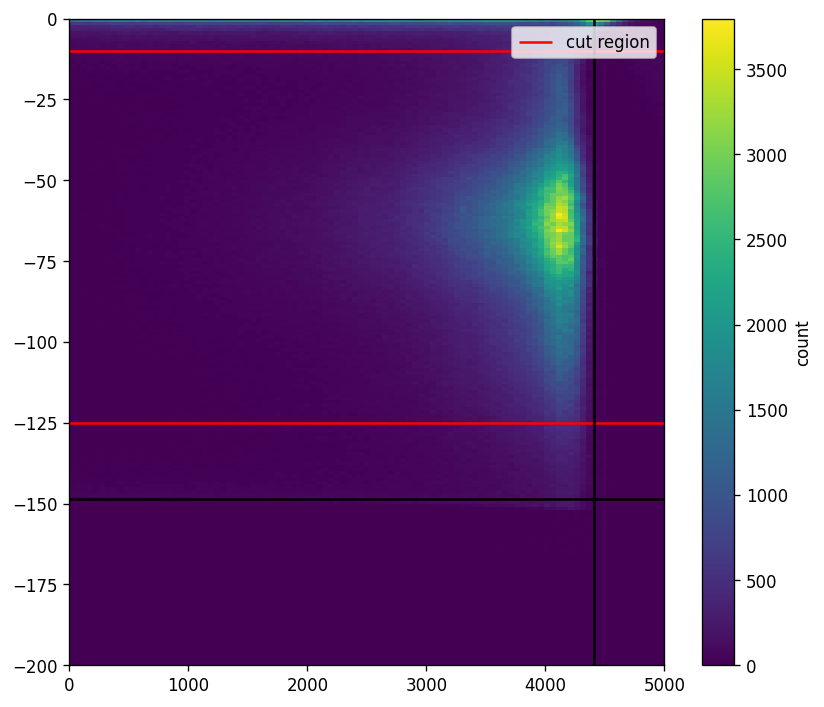

In [14]:
fig = plt.figure(figsize=(8, 7), dpi=120)
ax = fig.add_subplot(111)
h = ax.pcolormesh(edges_r_z[0], edges_r_z[1], hist_r_z.T)
plt.colorbar(h, label='count')
ax.hlines([-height], xmin=edges_r_z[0][0], xmax=edges_r_z[0][-1], color='black')
ax.hlines(z_cut, xmin=edges_r_z[0][0], xmax=edges_r_z[0][-1], color='r', label='cut region')
ax.vlines([radius**2], ymin=edges_r_z[1][0], ymax=edges_r_z[1][-1], color='black')
ax.legend()
plt.show()

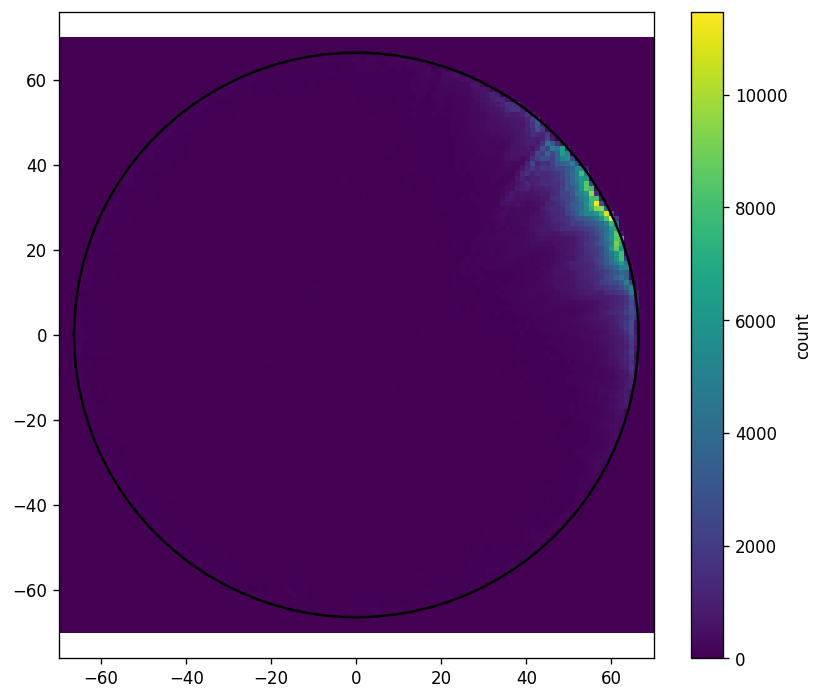

In [38]:
hist_x_y, edges_x_y = np.histogramdd([data['x'].values, data['y'].values], bins=[np.linspace(-70, 70, 121), np.linspace(-70, 70, 121)])
fig = plt.figure(figsize=(8, 7), dpi=120)
ax = fig.add_subplot(111)
ax.axis('equal')
h = ax.pcolormesh(edges_x_y[0], edges_x_y[1], hist_x_y.T)
theta = np.linspace(-np.pi, np.pi, 100)
x = np.cos(theta)*radius
y = np.sin(theta)*radius
ax.plot(x,y, color='black')
x_cutline = np.linspace(-30, 50, 10)
y_cutline = x_cutline*cut_params[0] + cut_params[1]
# ax.plot(x_cutline,y_cutline, color='red', label='cut region')
plt.colorbar(h, label='count')
plt.show()

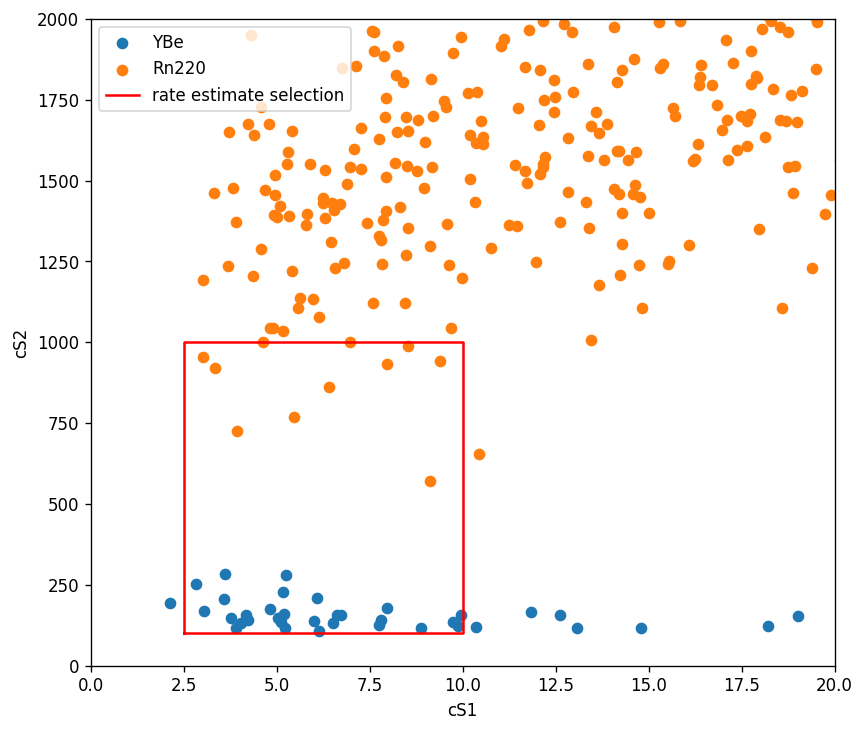

In [39]:
fig = plt.figure(figsize=(8, 7), dpi=120)
ax = fig.add_subplot(111)
ax.scatter(data_cuts['cs1'], data_cuts['cs2'], label='YBe')
ax.scatter(rn220_clean['cs1'], rn220_clean['cs2'], label='Rn220')
ax.plot(
    [rate_box_cs1[0], rate_box_cs1[0], rate_box_cs1[1], rate_box_cs1[1], rate_box_cs1[0]],
    [rate_box_cs2[0], rate_box_cs2[1], rate_box_cs2[1], rate_box_cs2[0], rate_box_cs2[0]],
    color='r', label='rate estimate selection'
)
ax.set(xlim=[0,20], ylim=[0,2000], xlabel='cS1', ylabel='cS2')
ax.legend()
plt.show()

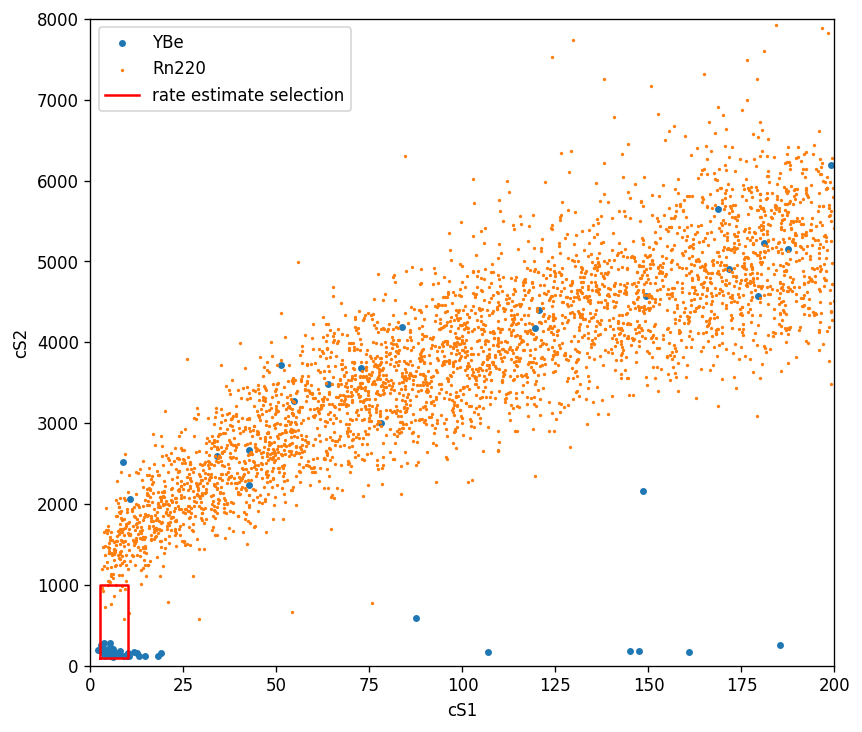

In [40]:
fig = plt.figure(figsize=(8, 7), dpi=120)
ax = fig.add_subplot(111)
ax.scatter(data_cuts['cs1'], data_cuts['cs2'], label='YBe', s=10)
ax.scatter(rn220_clean['cs1'], rn220_clean['cs2'], label='Rn220', s=1)
ax.plot(
    [rate_box_cs1[0], rate_box_cs1[0], rate_box_cs1[1], rate_box_cs1[1], rate_box_cs1[0]],
    [rate_box_cs2[0], rate_box_cs2[1], rate_box_cs2[1], rate_box_cs2[0], rate_box_cs2[0]],
    color='r', label='rate estimate selection'
)
ax.set(xlim=[0,200], ylim=[0,8000], xlabel='cS1', ylabel='cS2')
ax.legend()
plt.show()

In [11]:
data_cs1cs2_cuts = data_cuts.query('cs1<=@rate_box_cs1[1] and cs1>=@rate_box_cs1[0] and cs2<=@rate_box_cs2[1] and cs2>=@rate_box_cs2[0]')

In [12]:
data_cs1cs2_cuts_sm = data_cuts.query('cs1<=@rate_box_cs1_sm[1] and cs1>=@rate_box_cs1_sm[0] and cs2<=@rate_box_cs2_sm[1] and cs2>=@rate_box_cs2_sm[0]')

In [13]:
theta_cut = [-np.pi/4, np.pi/2]

In [14]:
fig = plt.figure(figsize=(8, 7), dpi=120)
ax = fig.add_subplot(111)
ax.axis('equal')
bkg_n=10000
ax.scatter(data['x'][:bkg_n], data['y'][:bkg_n], c='grey',s=1,alpha=0.1)
s = ax.scatter(data_cs1cs2_cuts['x'], data_cs1cs2_cuts['y'], c=data_cs1cs2_cuts['cs1'],s=data_cs1cs2_cuts['cs2']/10,alpha=0.7)
cb = plt.colorbar(s, label='cs1')
theta = np.linspace(-np.pi, np.pi, 100)
x = np.cos(theta)*radius
y = np.sin(theta)*radius
ax.plot(x,y, color='black',label='TPC')

x = np.cos(theta)*max_radius
y = np.sin(theta)*max_radius
ax.plot(x,y, color='black',linestyle='--',label='WIMP FV')

ax.set(xlim=[-70,70], ylim=[-70,70], xlabel='x (cm)', ylabel='y (cm)')
plt.legend()

plt.title('cS2=[100,1000]PE')
plt.show()

In [15]:
fig = plt.figure(figsize=(8, 7), dpi=120)
ax = fig.add_subplot(111)
ax.axis('equal')

s = ax.scatter(data_cs1cs2_cuts_sm['x'], data_cs1cs2_cuts_sm['y'], c=data_cs1cs2_cuts_sm['cs1'],s=data_cs1cs2_cuts_sm['cs2']/10,alpha=0.7)
cb = plt.colorbar(s, label='cs1')
theta = np.linspace(-np.pi, np.pi, 100)
x = np.cos(theta)*radius
y = np.sin(theta)*radius
ax.plot(x,y, color='black',label='TPC')

x = np.cos(theta)*max_radius
y = np.sin(theta)*max_radius
ax.plot(x,y, color='black',linestyle='--',label='WIMP FV')
ax.set(xlim=[-70,70], ylim=[-70,70], xlabel='x (cm)', ylabel='y (cm)')
plt.legend()
plt.title('cS2=[200,600]PE')
plt.show()

In [20]:
max_radius

61.35

In [19]:
xlim=[0,5000]
ylim=[-160,0]
fig = plt.figure(figsize=(8, 7), dpi=120)
ax = fig.add_subplot(111)
ax.scatter(data['x'][:bkg_n]**2,data['z'][:bkg_n], c='grey',s=1,alpha=0.1)
s = ax.scatter(data_cs1cs2_cuts['r'].values**2, data_cs1cs2_cuts['z'], c=data_cs1cs2_cuts['cs1'],s=data_cs1cs2_cuts['cs2']/10,alpha=0.7)
cb = plt.colorbar(s, label='cs1')
ax.hlines([-height], xmin=xlim[0], xmax=xlim[1], color='black')
ax.vlines([max_radius**2], ymin=ylim[0], ymax=ylim[1], color='black',linestyle='--')
ax.vlines([radius**2], ymin=ylim[0], ymax=ylim[1], color='black')
ax.hlines([max_z,min_z], xmin=xlim[0], xmax=xlim[1], color='k', label='FV',linestyle='--')
ax.set(xlim=xlim, ylim=ylim, xlabel='r^2 (cm^2)', ylabel='z (cm)')
plt.title('cS2=[100,1000]PE')
plt.show()

In [17]:
xlim=[0,5000]
ylim=[-160,0]
fig = plt.figure(figsize=(8, 7), dpi=120)
ax = fig.add_subplot(111)
# ax.scatter(data['x'][:bkg_n]**2,data['z'][:bkg_n], c='grey',s=1,alpha=0.1)
s = ax.scatter(data_cs1cs2_cuts_sm['r'].values**2, data_cs1cs2_cuts_sm['z'], c=data_cs1cs2_cuts_sm['cs1'],s=data_cs1cs2_cuts_sm['cs2']/10,alpha=0.7)
cb = plt.colorbar(s, label='cs1')
ax.hlines([-height], xmin=xlim[0], xmax=xlim[1], color='black')
ax.vlines([max_radius**2], ymin=ylim[0], ymax=ylim[1], color='black',linestyle='--')
ax.vlines([radius**2], ymin=ylim[0], ymax=ylim[1], color='black')
ax.hlines([max_z,min_z], xmin=xlim[0], xmax=xlim[1], color='k', label='FV',linestyle='--')
ax.set(xlim=xlim, ylim=ylim, xlabel='r^2 (cm^2)', ylabel='z (cm)')
plt.title('cS2=[200,600]PE')
plt.show()

In [71]:
data_geom_cuts = data_cs1cs2_cuts.query('z >= @z_cut[0] and z <= @z_cut[1] and y >= x*@cut_params[0] + @cut_params[1]')
data_geom_cuts_only = data_cuts.query('z >= @z_cut[0] and z <= @z_cut[1] and y >= x*@cut_params[0] + @cut_params[1]')

In [20]:
fig = plt.figure(figsize=(8, 7), dpi=120)
ax = fig.add_subplot(111)
ax.scatter(data_geom_cuts_only['cs1'], data_geom_cuts_only['cs2'], label='YBe')
ax.scatter(rn220_clean['cs1'], rn220_clean['cs2'], label='Rn220')
ax.plot(
    [rate_box_cs1[0], rate_box_cs1[0], rate_box_cs1[1], rate_box_cs1[1], rate_box_cs1[0]],
    [rate_box_cs2[0], rate_box_cs2[1], rate_box_cs2[1], rate_box_cs2[0], rate_box_cs2[0]],
    color='r', label='rate estimate selection'
)
ax.set(xlim=[0,20], ylim=[0,2000], xlabel='cS1', ylabel='cS2')
ax.legend()
plt.show()

NameError: name 'data_geom_cuts_only' is not defined

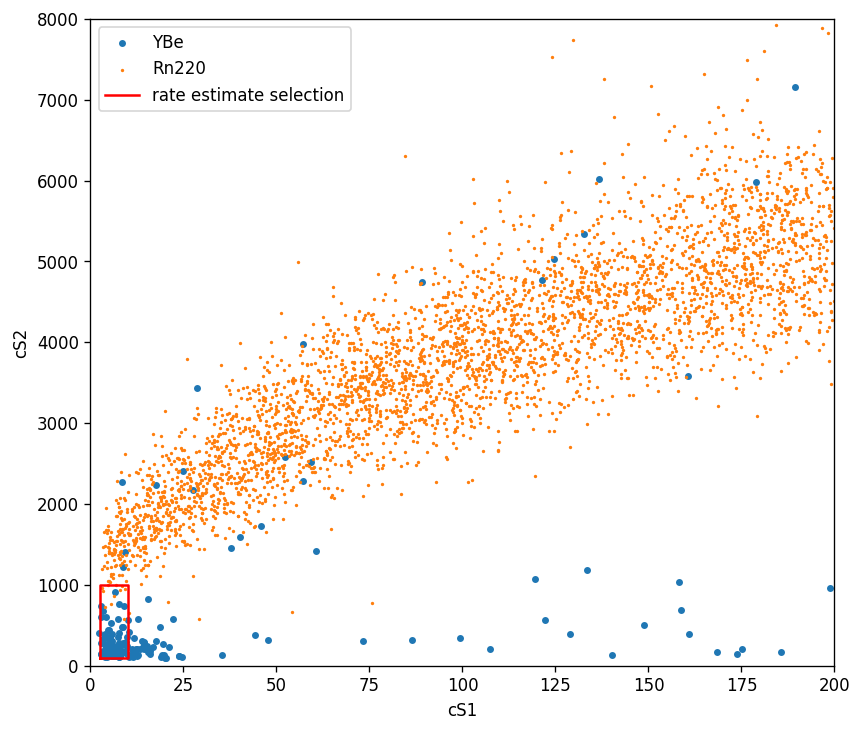

In [25]:
fig = plt.figure(figsize=(8, 7), dpi=120)
ax = fig.add_subplot(111)
ax.scatter(data_geom_cuts_only['cs1'], data_geom_cuts_only['cs2'], label='YBe', s=10)
ax.scatter(rn220_clean['cs1'], rn220_clean['cs2'], label='Rn220', s=1)
ax.plot(
    [rate_box_cs1[0], rate_box_cs1[0], rate_box_cs1[1], rate_box_cs1[1], rate_box_cs1[0]],
    [rate_box_cs2[0], rate_box_cs2[1], rate_box_cs2[1], rate_box_cs2[0], rate_box_cs2[0]],
    color='r', label='rate estimate selection'
)
ax.set(xlim=[0,200], ylim=[0,8000], xlabel='cS1', ylabel='cS2')
ax.legend()
plt.show()

In [26]:
# rate = len(data_geom_cuts)/(runs_all.query('name in @selected_runs')['livetime'].sum()/np.timedelta64(1, 's'))
# rate_err = np.sqrt(len(data_geom_cuts))/(runs_all.query('name in @selected_runs')['livetime'].sum()/np.timedelta64(1, 's'))

In [27]:
# print(f'Approximate NRSS rate is {rate*1000:0.2f}+/-{rate_err*1000:0.2f} mHz')

In [5]:
# filename ='/dali/lgrandi/pkavrigin/2022-08-07_YBeNeutron/ybe_neutron_nr_event_info.csv'
filename = '/dali/lgrandi/pkavrigin/2022-10-19_YBeNeutron/event_info.csv'
df_nr = pd.read_csv(filename)
# df_nr=df_nr.dropna()
len(df_nr)

854749

In [49]:
a = pd.read_csv('/dali/lgrandi/pkavrigin/2022-08-07_YBeNeutron/ybe_neutron_nr_event_info.csv')
len(df_nr)/len(a)*91

15393.263209974273

In [21]:
xx1=xx=np.array([  1.,   3.,   5.,   7.,   9.,  11.,  13.,  15.,  17.,  19.,  21.,
         23.,  25.,  27.,  29.,  31.,  33.,  35.,  37.,  39.,  41.,  43.,
         45.,  47.,  49.,  51.,  53.,  55.,  57.,  59.,  61.,  63.,  65.,
         67.,  69.,  71.,  73.,  75.,  77.,  79.,  81.,  83.,  85.,  87.,
         89.,  91.,  93.,  95.,  97.,  99., 101., 103., 105., 107., 109.,
        111., 113., 115., 117., 119., 121., 123., 125., 127., 129., 131.,
        133., 135., 137., 139., 141., 143., 145., 147., 149., 151., 153.,
        155., 157., 159., 161., 163., 165., 167., 169., 171., 173., 175.,
        177., 179., 181., 183., 185., 187., 189., 191., 193., 195., 197.,
        199.])
yy=np.array([ 541.19124461,  601.9918823 ,  661.94901198,  721.07227172,
         779.37129956,  836.85573356,  893.53521175,  949.41937219,
        1004.51785293, 1058.84029203, 1112.39632752, 1165.19559747,
        1217.24773991, 1268.56239291, 1319.14919451, 1369.01778275,
        1418.1777957 , 1466.6388714 , 1514.41064789, 1561.50276324,
        1607.92485549, 1653.68656269, 1698.79752288, 1743.26737413,
        1787.10575448, 1830.32230198, 1872.92665467, 1914.92845062,
        1956.33732787, 1997.16292446, 2037.41487846, 2077.10282791,
        2116.23641085, 2154.82526535, 2192.87902944, 2230.40734119,
        2267.41983863, 2303.92615982, 2339.93594281, 2375.45882565,
        2410.50444639, 2445.08244308, 2479.20245377, 2512.87411651,
        2546.10706935, 2578.91095033, 2611.29539752, 2643.27004895,
        2674.84454268, 2706.02851677, 2736.83160925, 2767.26345818,
        2797.3337016 , 2827.05197758, 2856.42792415, 2885.47117938,
        2914.1913813 , 2942.59816797, 2970.70117744, 2998.51004776,
        3026.03441697, 3053.28392314, 3080.2682043 , 3106.99689851,
        3133.47964382, 3159.72607827, 3185.74583993, 3211.54856683,
        3237.14389703, 3262.54146858, 3287.75091953, 3312.78188792,
        3337.64401181, 3362.34692925, 3386.90027829, 3411.31369697,
        3435.59682336, 3459.75929549, 3483.81075142, 3507.76082919,
        3531.61916686, 3555.39540248, 3579.0991741 , 3602.74011977,
        3626.32787753, 3649.87208544, 3673.38238154, 3696.8684039 ,
        3720.33979055, 3743.80617955, 3767.27720894, 3790.76251678,
        3814.27174112, 3837.81452001, 3861.40049149, 3885.03929362,
        3908.74056445, 3932.51394202, 3956.36906439, 3980.3155696 ])
yy1=np.array([1786.96280145, 1886.68103233, 1985.04219375, 2082.05877585,
        2177.74326876, 2272.1081626 , 2365.16594751, 2456.92911361,
        2547.41015104, 2636.62154992, 2724.57580038, 2811.28539256,
        2896.76281657, 2981.02056256, 3064.07112064, 3145.92698096,
        3226.60063364, 3306.1045688 , 3384.45127658, 3461.6532471 ,
        3537.72297051, 3612.67293691, 3686.51563646, 3759.26355926,
        3830.92919546, 3901.52503519, 3971.06356856, 4039.55728572,
        4107.01867679, 4173.46023189, 4238.89444117, 4303.33379475,
        4366.79078275, 4429.27789531, 4490.80762256, 4551.39245462,
        4611.04488163, 4669.77739372, 4727.60248101, 4784.53263363,
        4840.58034172, 4895.75809539, 4950.07838479, 5003.55370004,
        5056.19653127, 5108.01936861, 5159.03470219, 5209.25502214,
        5258.69281858, 5307.36058166, 5355.27080148, 5402.4359682 ,
        5448.86857193, 5494.5811028 , 5539.58605094, 5583.89590649,
        5627.52315958, 5670.48030032, 5712.77981885, 5754.43420531,
        5795.45594981, 5835.8575425 , 5875.65147349, 5914.85023292,
        5953.46631092, 5991.51219761, 6029.00038313, 6065.9433576 ,
        6102.35361116, 6138.24363393, 6173.62591605, 6208.51294764,
        6242.91721883, 6276.85121975, 6310.32744053, 6343.3583713 ,
        6375.95650219, 6408.13432333, 6439.90432484, 6471.27899687,
        6502.27082953, 6532.89231296, 6563.15593728, 6593.07419262,
        6622.65956912, 6651.92455691, 6680.8816461 , 6709.54332684,
        6737.92208925, 6766.03042346, 6793.8808196 , 6821.4857678 ,
        6848.85775818, 6876.00928089, 6902.95282604, 6929.70088377,
        6956.26594421, 6982.66049748, 7008.89703371, 7034.98804304])

In [22]:
def test_cuts(df_nr):
    events = df_nr.loc[
        True
                &(df_nr['cut_cs2_area_fraction_top'])
              
                # &(df_nr['cuts_basic'])
                &(df_nr['cut_s1_tightcoin_3fold'])

                &(df_nr['cut_interaction_exists'])
                &(df_nr['cut_s1_area_fraction_top'])
                &(df_nr['cut_s1_max_pmt'])
                &(df_nr['cut_s1_pattern_bottom'])
                &(df_nr['cut_s1_pattern_top'])
                &(df_nr['cut_s1_single_scatter'])
                &(df_nr['cut_s2_width_wire_modeled_wimps'])
               &(df_nr['cut_fiducial_volume'])
               &(df_nr['cut_s2_naive_bayes'])
               &(df_nr['cut_s2_recon_pos_diff'])
        
        
               &(df_nr['cut_s1_width']) #big cut
                &(df_nr['cut_s2_pattern']) #big cut
               
               &(df_nr['cut_s2_single_scatter']) #big

        
               &(df_nr['cut_s1_naive_bayes']) #x
                &(df_nr['cut_bdt_ac']) #x
        # &(df_nr.cs1<10)
        # &(df_nr.cs2<1000)
               
                ]
    return events

In [23]:
import seaborn as sns
fig = plt.figure(figsize=(8, 6), dpi=120)
ax = fig.add_subplot(111)
ax.scatter(data['cs1'], data['cs2'], color='k', marker='.',label='YBe(no cuts)', s=10)
# sns.kdeplot(x=df_nr.cs1, y=df_nr.cs2,thresh=0.1,levels=1,)
plt.plot(xx1, yy1, color='purple',linestyle='--')
plt.plot(xx,yy, color='purple',linestyle='--',label='Rn220 90%')
ax.plot(
    [rate_box_cs1[0], rate_box_cs1[0], rate_box_cs1[1], rate_box_cs1[1], rate_box_cs1[0]],
    [rate_box_cs2[0], rate_box_cs2[1], rate_box_cs2[1], rate_box_cs2[0], rate_box_cs2[0]],
    color='r', label='ROI', linestyle='--',linewidth=1
)
#sns.kdeplot(ax=ax,x=test_cuts(df_nr).cs1, y=test_cuts(df_nr).cs2,thresh=0.1,levels=1,label=f'Simulated YBe 90% \n ({len(test_cuts(df_nr))} after cuts)')



ax.set(xlim=[0,100], ylim=[0,4000], xlabel='cS1', ylabel='cS2')
ax.legend()

plt.show()



In [24]:
import seaborn as sns
fig = plt.figure(figsize=(8, 6), dpi=120)
ax = fig.add_subplot(111)
ax.scatter(data_cuts['cs1'], data_cuts['cs2'], color='k', marker='.',label='YBe', s=10)
# sns.kdeplot(x=df_nr.cs1, y=df_nr.cs2,thresh=0.1,levels=1,)
sns.kdeplot(x=test_cuts(df_nr).cs1, y=test_cuts(df_nr).cs2,thresh=0.1,levels=1,color='b')
plt.plot(xx1, yy1, color='purple',linestyle='--')
plt.plot(xx,yy, color='purple',linestyle='--',label='Rn220 90%')
ax.plot([-1e9,-1e9],'b',label=f'Simulated YBe 90%')
ax.plot(
    [rate_box_cs1[0], rate_box_cs1[0], rate_box_cs1[1], rate_box_cs1[1], rate_box_cs1[0]],
    [rate_box_cs2[0], rate_box_cs2[1], rate_box_cs2[1], rate_box_cs2[0], rate_box_cs2[0]],
    color='r', label='ROI', linestyle='--',linewidth=1
)
ax.set(xlim=[0,100], ylim=[0,4000], xlabel='cS1', ylabel='cS2')
ax.legend()

plt.show()



KeyboardInterrupt: 

In [26]:
sel=data_cuts.cs1>rate_box_cs1[0]
sel&=data_cuts.cs1<rate_box_cs1[1]
sel&=data_cuts.cs2>rate_box_cs2[0]
sel&=data_cuts.cs2<rate_box_cs2[1]
data_cut_loose=data_cuts[sel]

In [27]:
sel=data_cuts.cs1>rate_box_cs1_sm[0]
sel&=data_cuts.cs1<rate_box_cs1_sm[1]
sel&=data_cuts.cs2>rate_box_cs2_sm[0]
sel&=data_cuts.cs2<rate_box_cs2_sm[1]
data_cut_strict=data_cuts[sel]

In [28]:
len(data_cut_loose)

516

In [29]:
len(data_cut_strict)

192

In [31]:
hour=183.78

In [32]:
rate_l = len(data_cut_loose)/(hour*3600)
rate_err_l = np.sqrt(len(data_cut_loose))/(hour*3600)
rate_l*1000

0.7799180179199768

In [33]:
rate_s = len(data_cut_strict)/(hour*3600)
rate_err_s = np.sqrt(len(data_cut_strict))/(hour*3600)
rate_s*1000

0.29020205317952624

In [34]:
def do_cuts(df_nr):
    events = df_nr.loc[ #(df_nr['cs1']<10)&(df_nr['cs1']>0)&(df_nr['cs2']>=10)
              # &(df_nr['cs2']<=1000)
                (df_nr['cut_cs2_area_fraction_top'])
                # &(df_nr['cut_wimp_search_s2_area'])
                #&(df_nr['cuts_basic'])
                # &(df_nr['cut_daq_veto'])
                # &(df_nr['cut_main_is_valid_triggering_peak'])
                &(df_nr['cut_interaction_exists'])
                # &(df_nr['cut_run_boundaries'])
                &(df_nr['cut_s1_area_fraction_top'])
                &(df_nr['cut_s1_max_pmt'])
                &(df_nr['cut_s1_pattern_bottom'])
                &(df_nr['cut_s1_pattern_top'])
                &(df_nr['cut_s1_single_scatter'])
               &(df_nr['cut_s1_width'])
                &(df_nr['cut_s2_pattern'])
               &(df_nr['cut_s2_recon_pos_diff'])
               &(df_nr['cut_s2_single_scatter'])
               &(df_nr['cut_s2_width_wire_modeled_wimps'])
              # &(df_nr['cut_nv_tpc_coincidence_ambe'])
               &(df_nr['cut_fiducial_volume'])
               &(df_nr['cut_s2_naive_bayes'])
               &(df_nr['cut_s1_naive_bayes'])
                &(df_nr['cut_bdt_ac'])
            &(df_nr['cut_s1_tightcoin_3fold'])
               
                ]
    return events

In [35]:
sim=do_cuts(df_nr)
decay=0.9
gamma_ineff=0.9

In [36]:
sel=sim.cs1>rate_box_cs1[0]
sel&=sim.cs1<rate_box_cs1[1]
sel&=sim.cs2>rate_box_cs2[0]
sel&=sim.cs2<rate_box_cs2[1]
sim_rate_l=len(sim[sel])/91/3600*1000*decay*gamma_ineff
sim_rate_l_err=np.sqrt(len(sim[sel]))/91/3600*1000*decay*gamma_ineff


In [37]:
print('total count(l):',np.sum(runs_all.livetime)/np.timedelta64(1, 's')*(sim_rate_l-sim_rate_l_err)/1000)

NameError: name 'runs_all' is not defined

In [38]:
sel=sim.cs1>rate_box_cs1_sm[0]
sel&=sim.cs1<rate_box_cs1_sm[1]
sel&=sim.cs2>rate_box_cs2_sm[0]
sel&=sim.cs2<rate_box_cs2_sm[1]
sim_rate_s=len(sim[sel])/91/3600*1000*decay*gamma_ineff
sim_rate_s_err=np.sqrt(len(sim[sel]))/91/3600*1000*decay*gamma_ineff

In [39]:
print('total count(s):',np.sum(runs_all.livetime)/np.timedelta64(1, 's')*(sim_rate_s-sim_rate_s_err)/1000)

NameError: name 'runs_all' is not defined

In [46]:
import seaborn as sns
fig = plt.figure(figsize=(8, 6), dpi=120)
ax = fig.add_subplot(111)

ax.scatter(data_cuts['cs1'], data_cuts['cs2'], color='k', marker='o',label='YBe', s=10)
# sns.kdeplot(x=df_nr.cs1, y=df_nr.cs2,thresh=0.1,levels=1,)
sns.kdeplot(x=test_cuts(df_nr).cs1, y=test_cuts(df_nr).cs2,thresh=0.1,levels=1,color='b')
plt.plot(xx1, yy1, color='purple',linestyle='--')
plt.plot(xx,yy, color='purple',linestyle='--',label='Rn220 median 90%')
ax.plot([1e9,1e9],'b',label=f'Simulated YBe 90%')
ax.plot(
    [rate_box_cs1[0], rate_box_cs1[0], rate_box_cs1[1], rate_box_cs1[1], rate_box_cs1[0]],
    [rate_box_cs2[0], rate_box_cs2[1], rate_box_cs2[1], rate_box_cs2[0], rate_box_cs2[0]],
    color='r', label=f'data={rate_l*1000:.2f}$\pm${rate_err_l*1000:.2f}mHz, sim={sim_rate_l:.2f}$\pm${sim_rate_l_err:.2f}mHz', linestyle='--',linewidth=1
)

ax.plot(
    [rate_box_cs1_sm[0], rate_box_cs1_sm[0], rate_box_cs1_sm[1], rate_box_cs1_sm[1], rate_box_cs1_sm[0]],
    [rate_box_cs2_sm[0], rate_box_cs2_sm[1], rate_box_cs2_sm[1], rate_box_cs2_sm[0], rate_box_cs2_sm[0]],
    color='g', label=f'data={rate_s*1000:.2f}$\pm${rate_err_s*1000:.2f}mHz, sim={sim_rate_s:.2f}$\pm${sim_rate_s_err:.2f}mHz', linestyle='-.',linewidth=1.5
)
ax.set(xlim=[0,20], ylim=[0,1500], xlabel='cS1', ylabel='cS2')
ax.legend()

plt.show()



In [40]:
%run -i 'YBe_tool.py'
plot_cs1cs2(data_cuts,df_sim=test_cuts(df_nr))

In [45]:
data_cuts.to_hdf('good_data.hdf5','data')
test_cuts(df_nr).to_hdf('good_sim.hdf5','sim')


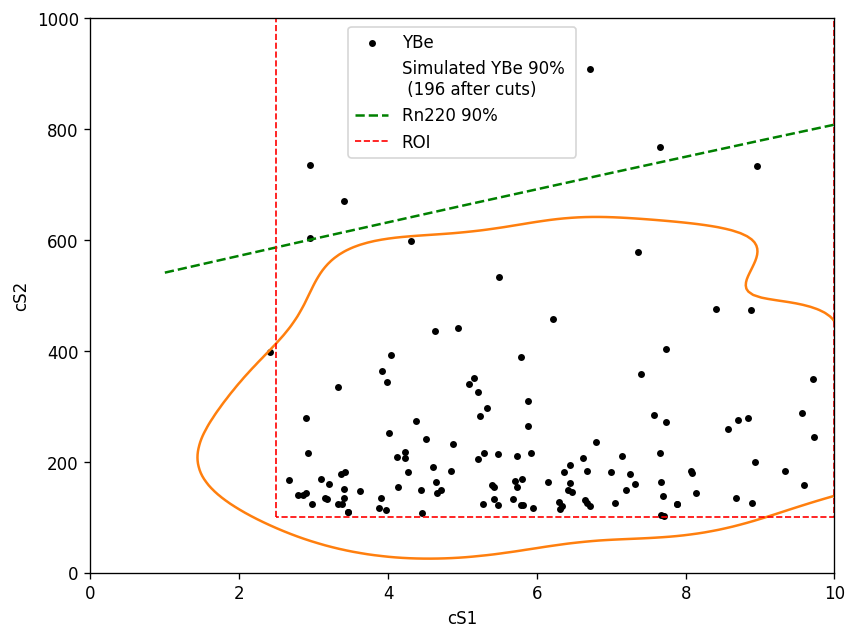

In [67]:
import seaborn as sns
fig = plt.figure(figsize=(8, 6), dpi=120)
ax = fig.add_subplot(111)
ax.plot([1e5])
ax.scatter(data_cuts['cs1'], data_cuts['cs2'], color='k', marker='o',label='YBe', s=10)
# sns.kdeplot(x=df_nr.cs1, y=df_nr.cs2,thresh=0.1,levels=1,)
sns.kdeplot(x=test_cuts(df_nr).cs1, y=test_cuts(df_nr).cs2,thresh=0.1,levels=1,label=f'Simulated YBe 90% \n ({len(test_cuts(df_nr))} after cuts)')
plt.plot(xx1, yy1, color='green',linestyle='--')
plt.plot(xx,yy, color='green',linestyle='--',label='Rn220 90%')
ax.plot(
    [rate_box_cs1[0], rate_box_cs1[0], rate_box_cs1[1], rate_box_cs1[1], rate_box_cs1[0]],
    [rate_box_cs2[0], rate_box_cs2[1], rate_box_cs2[1], rate_box_cs2[0], rate_box_cs2[0]],
    color='r', label='ROI', linestyle='--',linewidth=1
)
ax.set(xlim=[0,10], ylim=[0,1000], xlabel='cS1', ylabel='cS2')
ax.legend()

plt.show()



In [68]:
def make_cuts(df, cutlist):
    for cut in cutlist:
        df=df[df[cut]]
    return df

In [49]:
%run -i '~/mycode/pos_diff_util.py'

In [50]:
# for i in range(len(data_cs1cs2_cuts)):
#     look_evt(i,data_cs1cs2_cuts,no_hit_map=True, save_to_html=True)

In [51]:
df_pass=test_cuts(data_cuts)

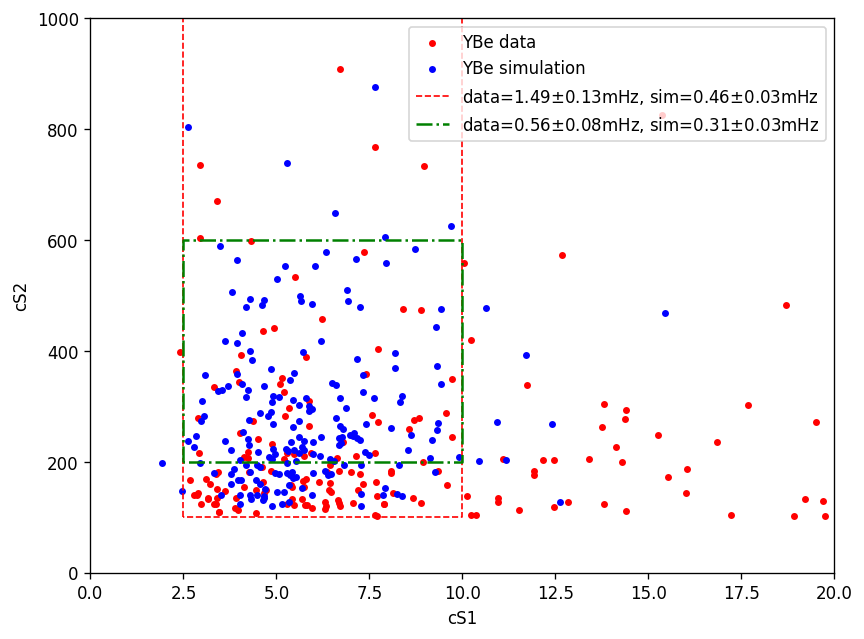

In [52]:
import seaborn as sns
fig = plt.figure(figsize=(8, 6), dpi=120)
ax = fig.add_subplot(111)

ax.scatter(data_cuts['cs1'], data_cuts['cs2'], color='r', marker='o',label='YBe data', s=10)
# sns.kdeplot(x=df_nr.cs1, y=df_nr.cs2,thresh=0.1,levels=1,)
ax.scatter(test_cuts(df_nr).cs1, test_cuts(df_nr).cs2,color='b',label='YBe simulation',s=10, marker='o')

ax.plot(
    [rate_box_cs1[0], rate_box_cs1[0], rate_box_cs1[1], rate_box_cs1[1], rate_box_cs1[0]],
    [rate_box_cs2[0], rate_box_cs2[1], rate_box_cs2[1], rate_box_cs2[0], rate_box_cs2[0]],
    color='r', label=f'data={rate_l*1000:.2f}$\pm${rate_err_l*1000:.2f}mHz, sim={sim_rate_l:.2f}$\pm${sim_rate_l_err:.2f}mHz', linestyle='--',linewidth=1
)

ax.plot(
    [rate_box_cs1_sm[0], rate_box_cs1_sm[0], rate_box_cs1_sm[1], rate_box_cs1_sm[1], rate_box_cs1_sm[0]],
    [rate_box_cs2_sm[0], rate_box_cs2_sm[1], rate_box_cs2_sm[1], rate_box_cs2_sm[0], rate_box_cs2_sm[0]],
    color='g', label=f'data={rate_s*1000:.2f}$\pm${rate_err_s*1000:.2f}mHz, sim={sim_rate_s:.2f}$\pm${sim_rate_s_err:.2f}mHz', linestyle='-.',linewidth=1.5
)

ax.set(xlim=[0,20], ylim=[0,1e3], xlabel='cS1', ylabel='cS2')
ax.legend()

plt.show()



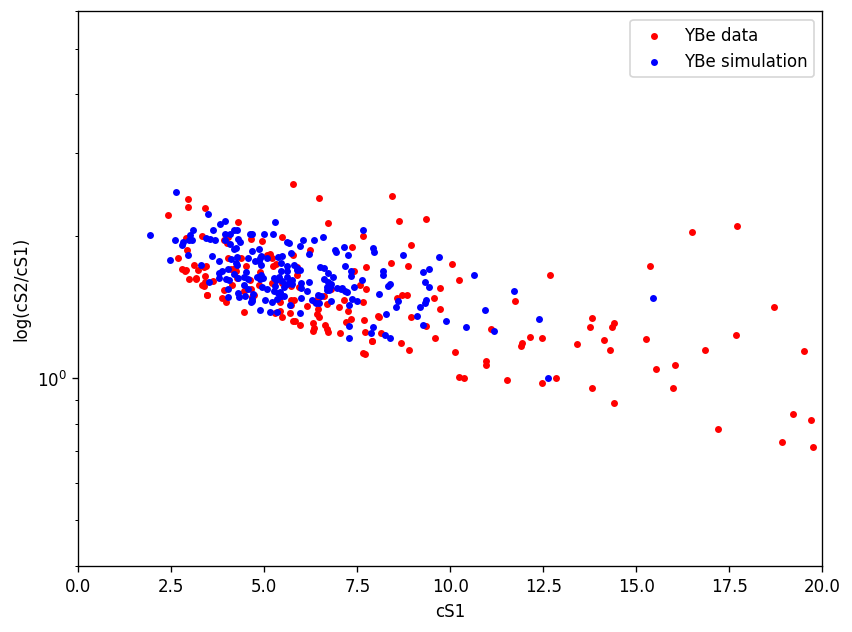

In [53]:
fig = plt.figure(figsize=(8, 6), dpi=120)
ax = fig.add_subplot(111)

ax.scatter(data_cuts['cs1'], np.log10(data_cuts['cs2']/data_cuts['cs1']), color='r', marker='o',label='YBe data', s=10)
# sns.kdeplot(x=df_nr.cs1, y=df_nr.cs2,thresh=0.1,levels=1,)
ax.scatter(test_cuts(df_nr).cs1, np.log10(test_cuts(df_nr).cs2/test_cuts(df_nr).cs1),color='b',label='YBe simulation',s=10, marker='o')

ax.set(xlim=[0,20], ylim=[0.4,6], xlabel='cS1', ylabel='log(cS2/cS1)',yscale='log')
ax.legend()

plt.show()



In [54]:
%run -i 'YBe_tool.py'

In [55]:
cut_acceptance(data)

'^ Awesome table ^^^^^\n^ cut ^ n_pre ^ n_after ^ fraction ^ cumulative_fraction ^\n| cut_bdt_ac | 4026527 | 3203917 | 0.7957 | 0.7957 |\n| cut_cs2_area_fraction_top | 3203917 | 310424 | 0.09689 | 0.07709 |\n| cut_daq_veto | 310424 | 309206 | 0.99608 | 0.07679 |\n| cut_fiducial_volume | 309206 | 48543 | 0.15699 | 0.01206 |\n| cut_interaction_exists | 48543 | 48543 | 1.0 | 0.01206 |\n| cut_main_is_valid_triggering_peak | 48543 | 48533 | 0.99979 | 0.01205 |\n| cut_run_boundaries | 48533 | 48508 | 0.99948 | 0.01205 |\n| cut_s1_area_fraction_top | 48508 | 37958 | 0.78251 | 0.00943 |\n| cut_s1_max_pmt | 37958 | 37897 | 0.99839 | 0.00941 |\n| cut_s1_naive_bayes | 37897 | 37583 | 0.99171 | 0.00933 |\n| cut_s1_pattern_bottom | 37583 | 35986 | 0.95751 | 0.00894 |\n| cut_s1_pattern_top | 35986 | 35789 | 0.99453 | 0.00889 |\n| cut_s1_single_scatter | 35789 | 34526 | 0.96471 | 0.00857 |\n| cut_s1_tightcoin_3fold | 34526 | 31503 | 0.91244 | 0.00782 |\n| cut_s1_width | 31503 | 31373 | 0.99587 | 0.00

In [56]:
len(cut_cs1cs2(data,[0,10],[200,600]))/len(data)

0.0014672694359183485

In [57]:
cut_acceptance(cut_cs1cs2(data,[0,10],[200,600]))

'^ Awesome table ^^^^^\n^ cut ^ n_pre ^ n_after ^ fraction ^ cumulative_fraction ^\n| cut_bdt_ac | 5908 | 2284 | 0.38659 | 0.38659 |\n| cut_cs2_area_fraction_top | 2284 | 2243 | 0.98205 | 0.37965 |\n| cut_daq_veto | 2243 | 2186 | 0.97459 | 0.37001 |\n| cut_fiducial_volume | 2186 | 1395 | 0.63815 | 0.23612 |\n| cut_interaction_exists | 1395 | 1395 | 1.0 | 0.23612 |\n| cut_main_is_valid_triggering_peak | 1395 | 1392 | 0.99785 | 0.23561 |\n| cut_run_boundaries | 1392 | 1391 | 0.99928 | 0.23544 |\n| cut_s1_area_fraction_top | 1391 | 1365 | 0.98131 | 0.23104 |\n| cut_s1_max_pmt | 1365 | 1363 | 0.99853 | 0.2307 |\n| cut_s1_naive_bayes | 1363 | 1342 | 0.98459 | 0.22715 |\n| cut_s1_pattern_bottom | 1342 | 985 | 0.73398 | 0.16672 |\n| cut_s1_pattern_top | 985 | 985 | 1.0 | 0.16672 |\n| cut_s1_single_scatter | 985 | 979 | 0.99391 | 0.16571 |\n| cut_s1_tightcoin_3fold | 979 | 147 | 0.15015 | 0.02488 |\n| cut_s1_width | 147 | 137 | 0.93197 | 0.02319 |\n| cut_s2_naive_bayes | 137 | 136 | 0.9927 | 0

In [7]:
cut_acceptance(cut_cs1cs2(data,[0,10],[100,1000]))

'^ Awesome table ^^^^^\n^ cut ^ n_pre ^ n_after ^ fraction ^ cumulative_fraction ^\n| cut_bdt_ac | 15429 | 5803 | 0.37611 | 0.37611 |\n| cut_cs2_area_fraction_top | 5803 | 5700 | 0.98225 | 0.36943 |\n| cut_daq_veto | 5700 | 5533 | 0.9707 | 0.35861 |\n| cut_fiducial_volume | 5533 | 3687 | 0.66637 | 0.23897 |\n| cut_interaction_exists | 3687 | 3687 | 1.0 | 0.23897 |\n| cut_main_is_valid_triggering_peak | 3687 | 3680 | 0.9981 | 0.23851 |\n| cut_run_boundaries | 3680 | 3677 | 0.99918 | 0.23832 |\n| cut_s1_area_fraction_top | 3677 | 3632 | 0.98776 | 0.2354 |\n| cut_s1_max_pmt | 3632 | 3623 | 0.99752 | 0.23482 |\n| cut_s1_naive_bayes | 3623 | 3575 | 0.98675 | 0.23171 |\n| cut_s1_pattern_bottom | 3575 | 2609 | 0.72979 | 0.1691 |\n| cut_s1_pattern_top | 2609 | 2608 | 0.99962 | 0.16903 |\n| cut_s1_single_scatter | 2608 | 2585 | 0.99118 | 0.16754 |\n| cut_s1_tightcoin_3fold | 2585 | 281 | 0.1087 | 0.01821 |\n| cut_s1_width | 281 | 262 | 0.93238 | 0.01698 |\n| cut_s2_naive_bayes | 262 | 258 | 0.9

In [10]:
this=[]
for c in data.columns.values:
    if "cut" in c:
        this.append(c)

In [39]:
# for cut in this:
#     show_cut(data,cut,save=True)

In [12]:
data_loose=data[(data['cut_s1_tightcoin_3fold'])&(data['cut_fiducial_volume'])]

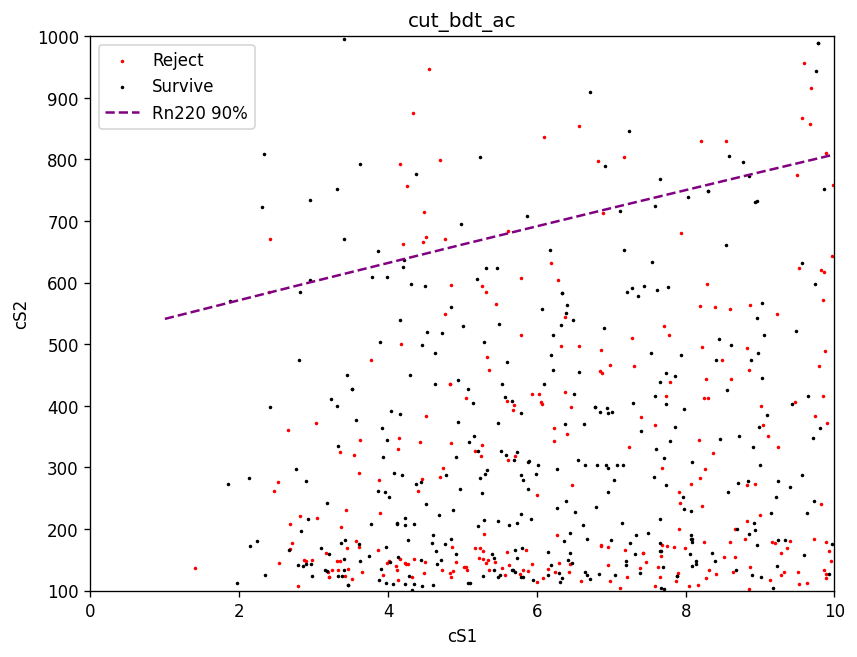

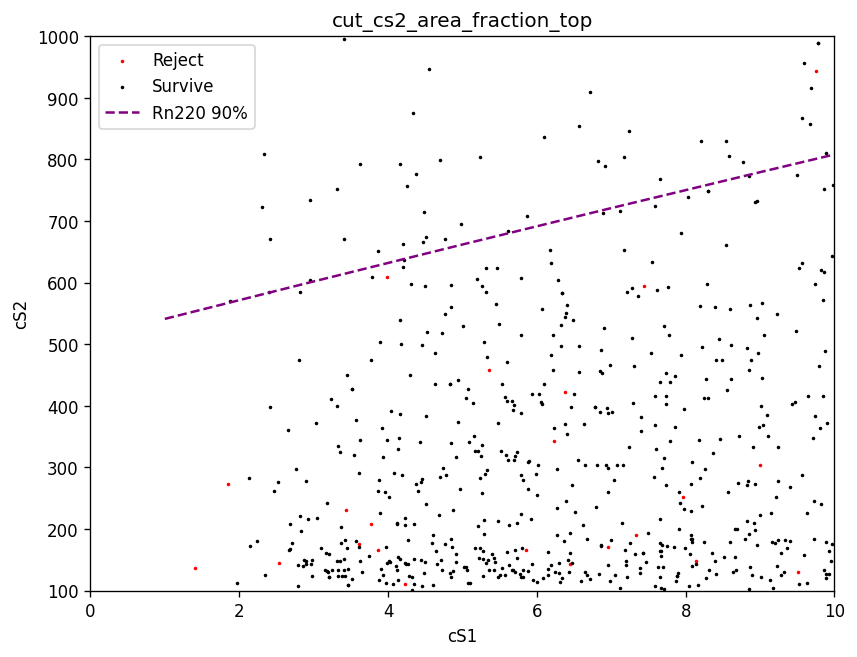

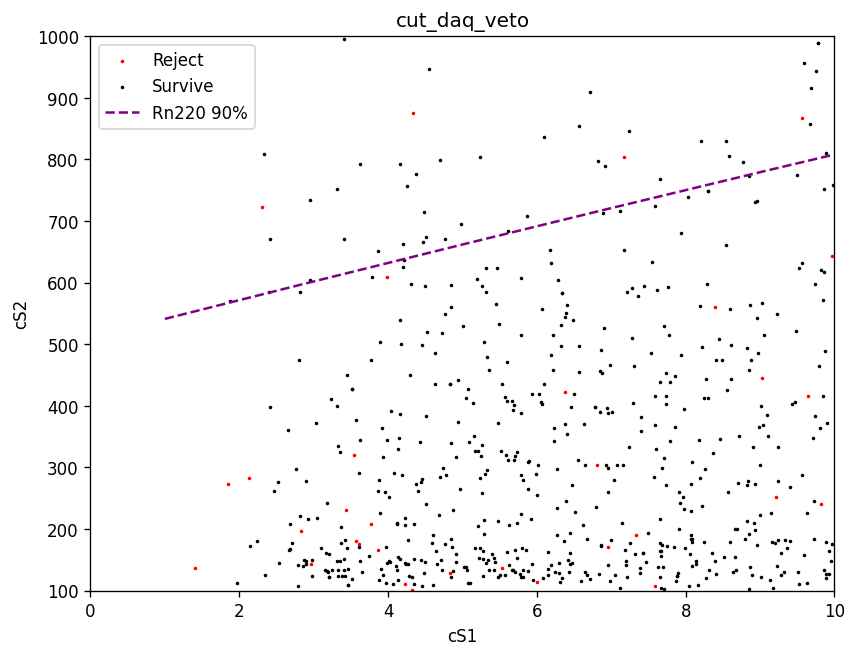

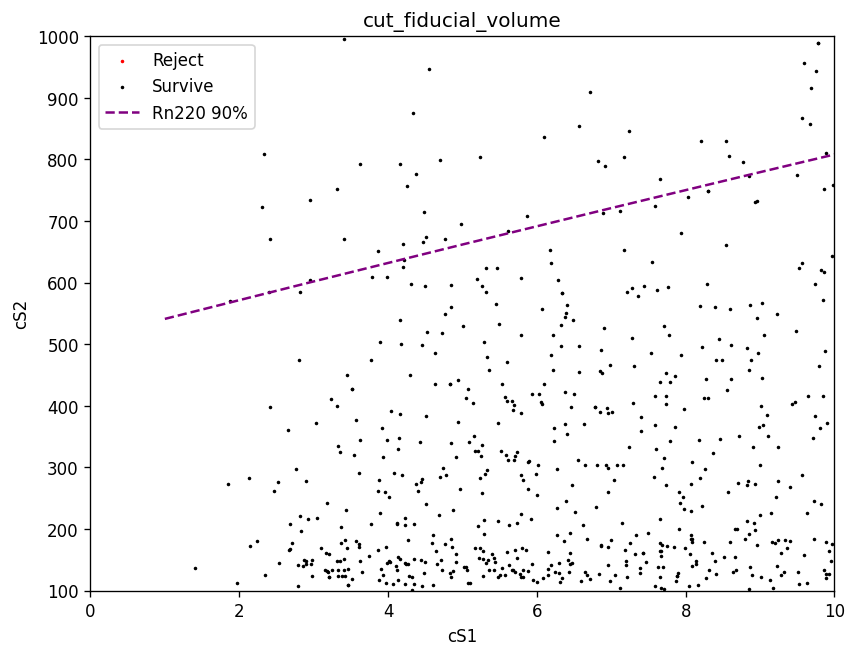

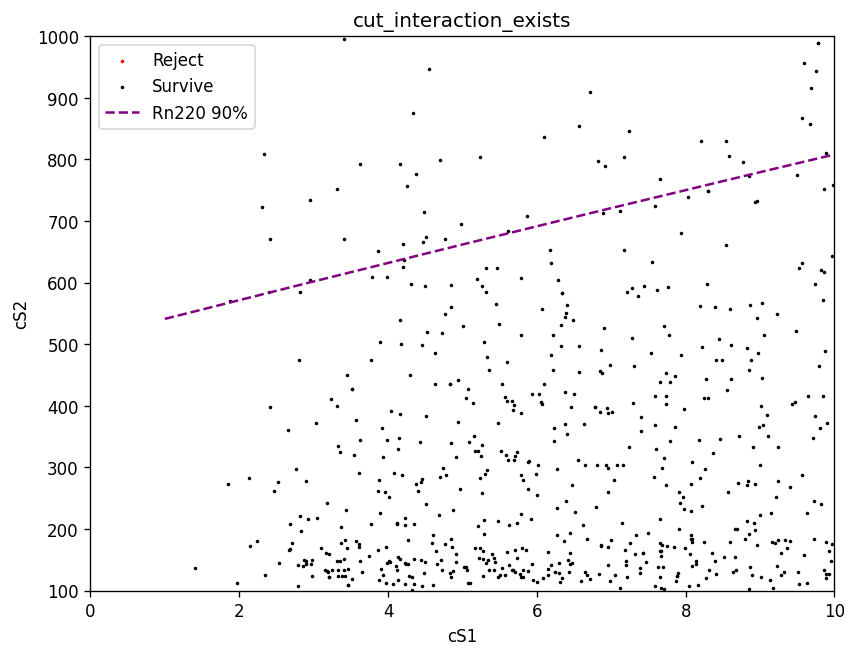

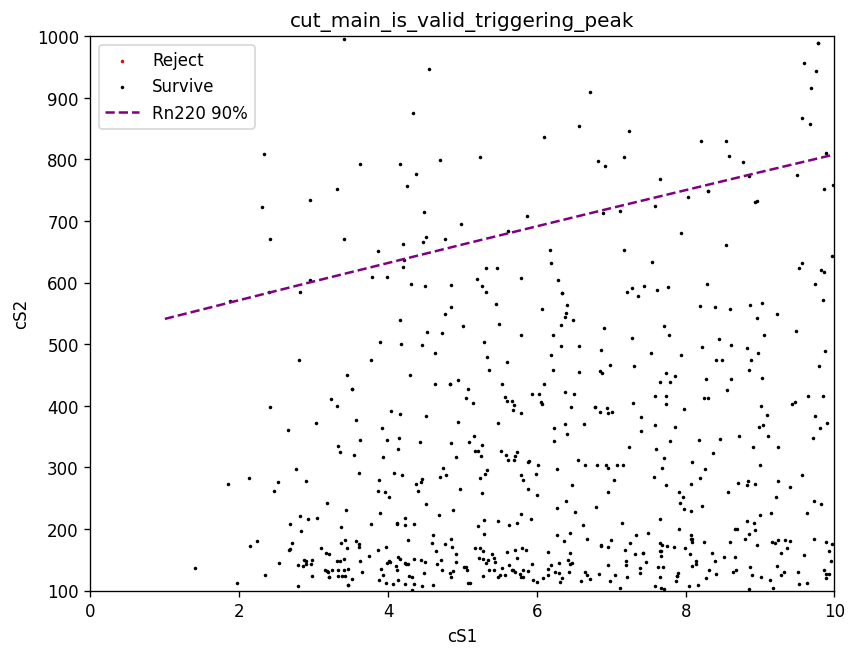

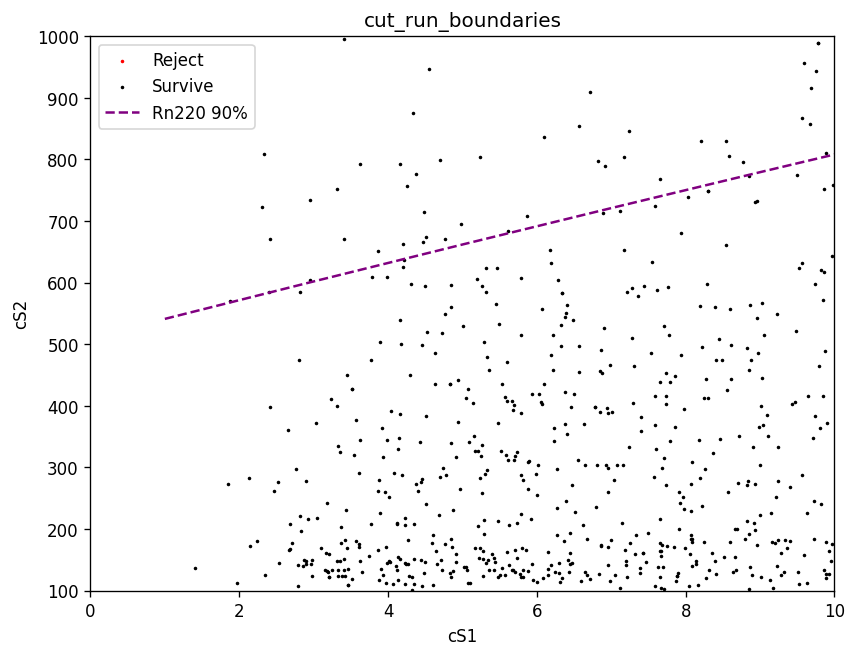

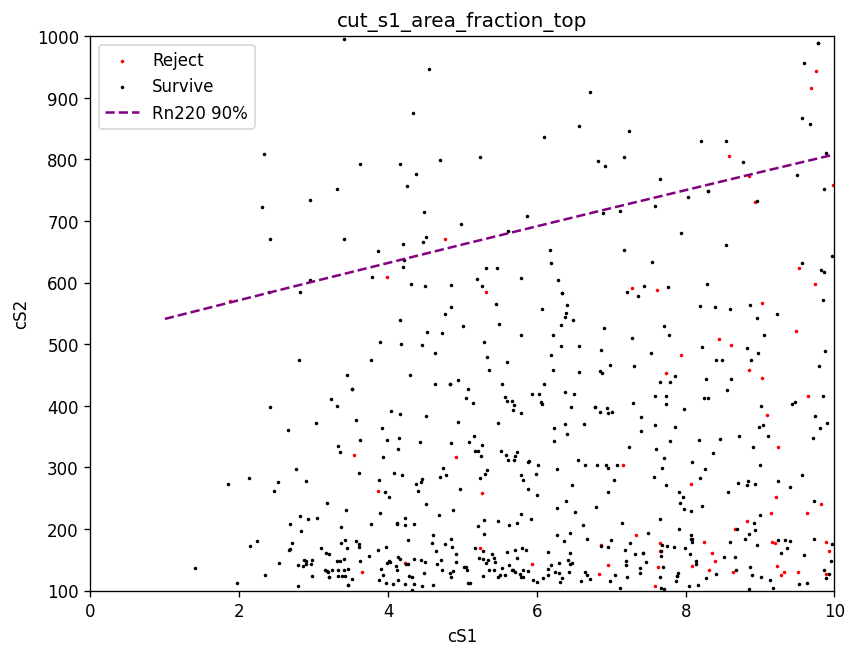

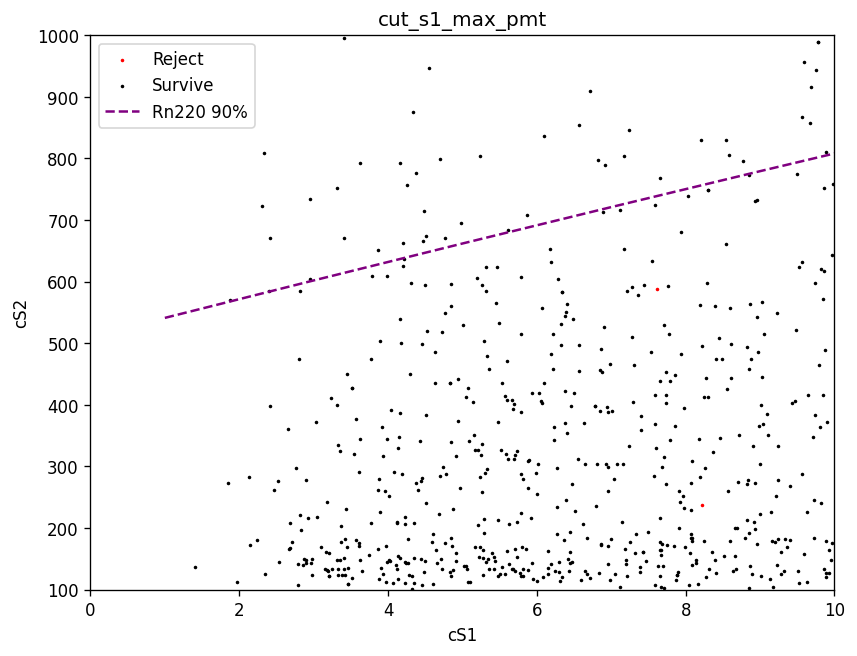

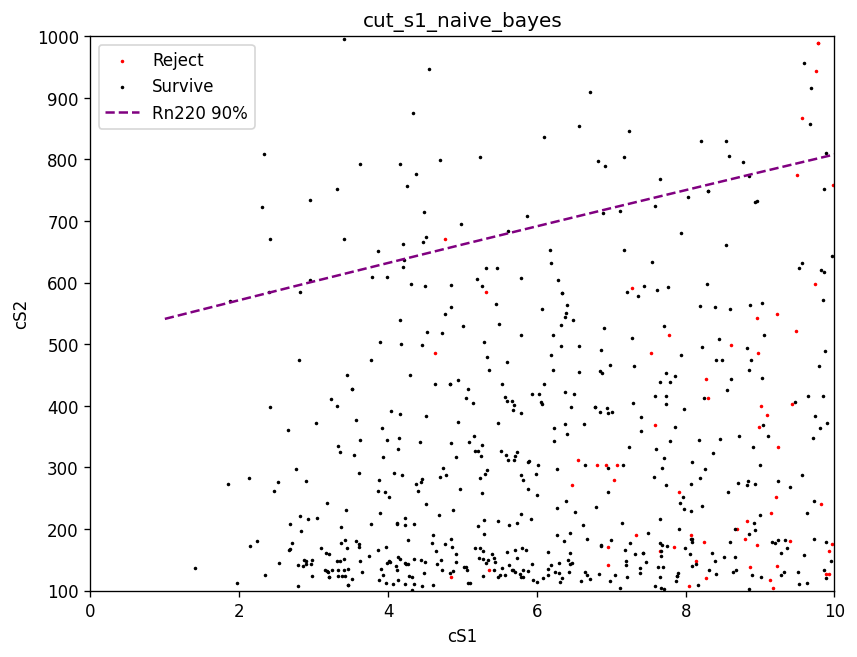

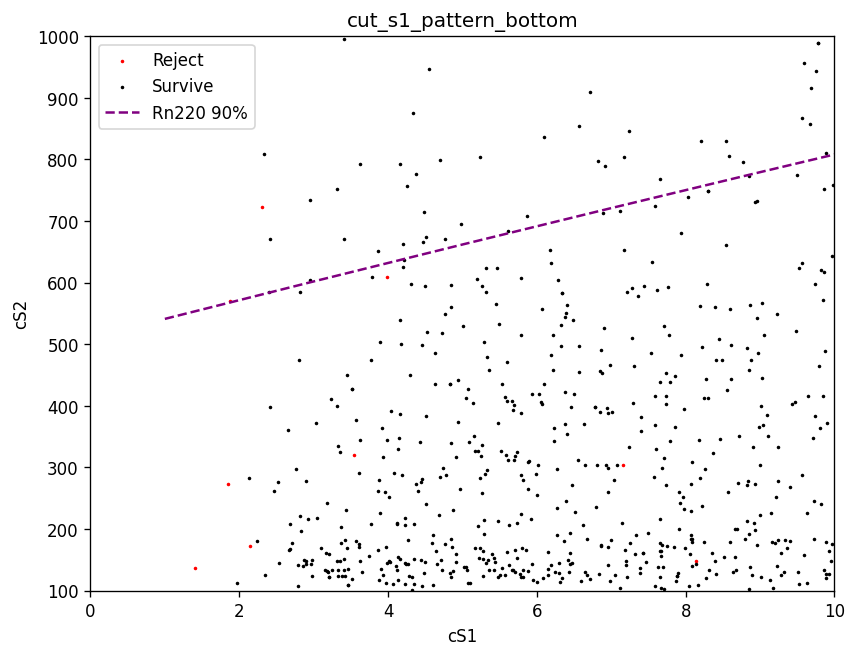

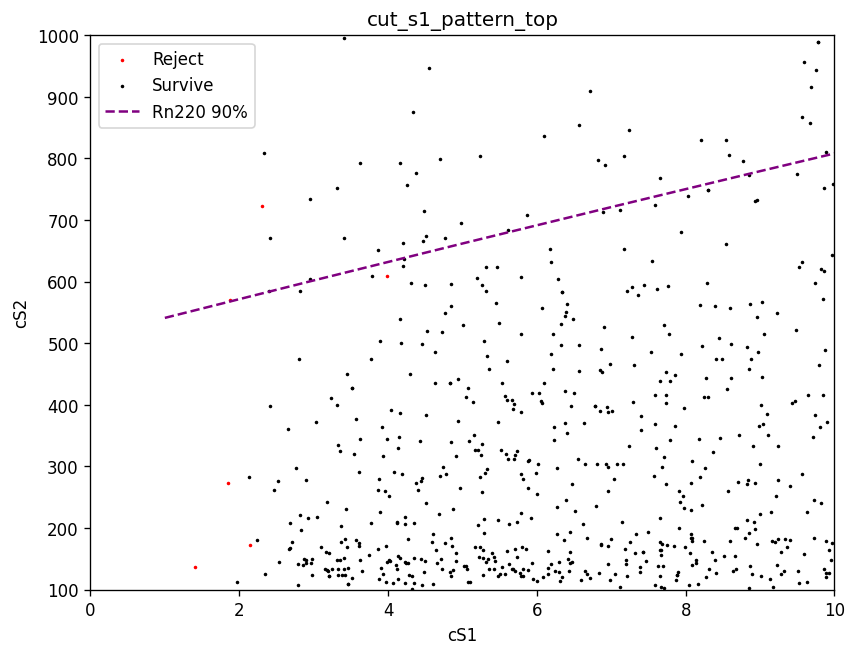

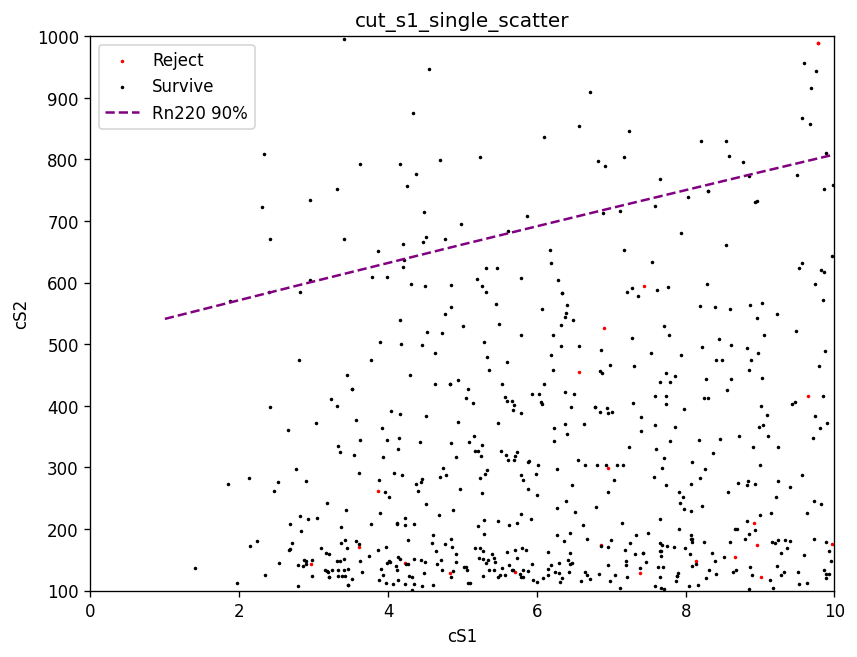

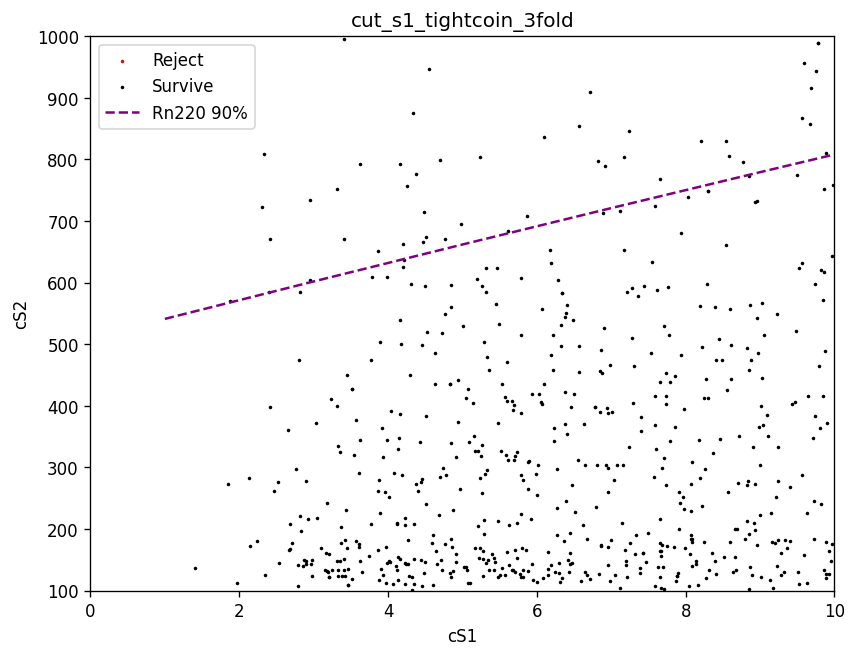

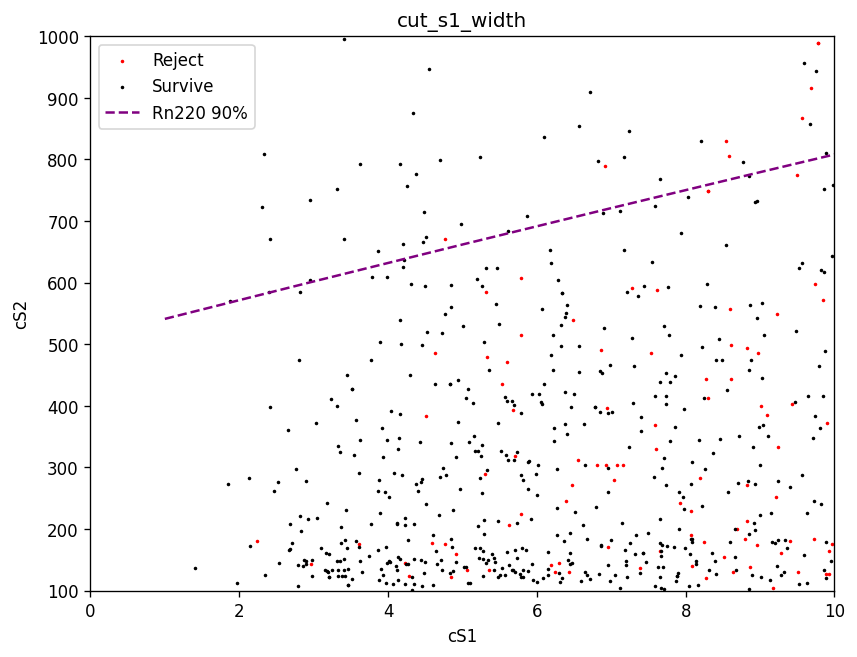

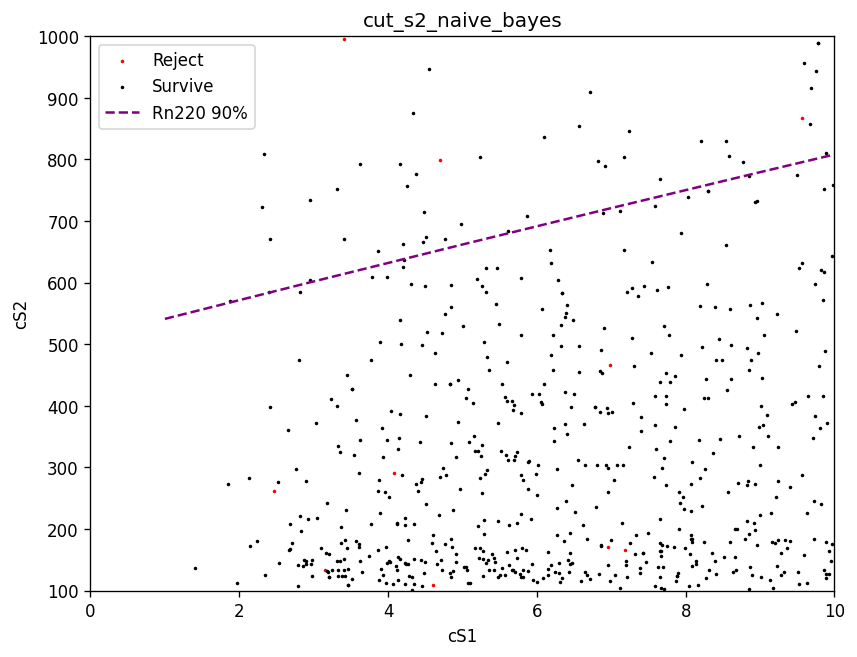

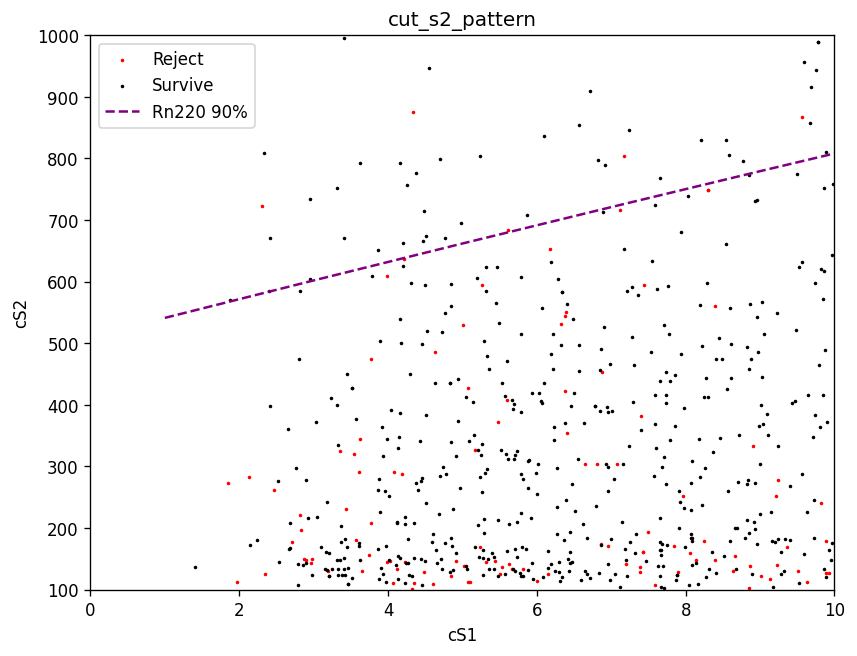

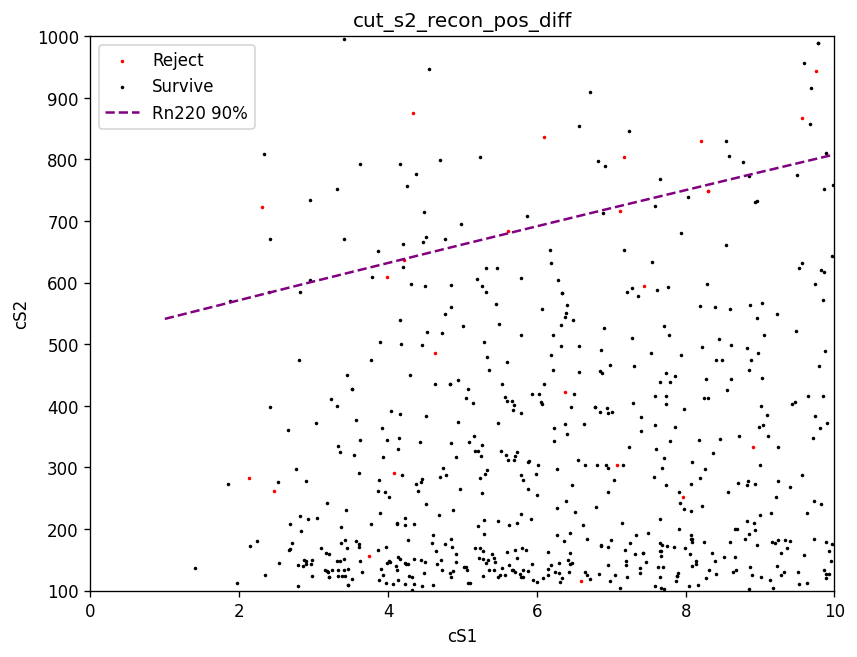

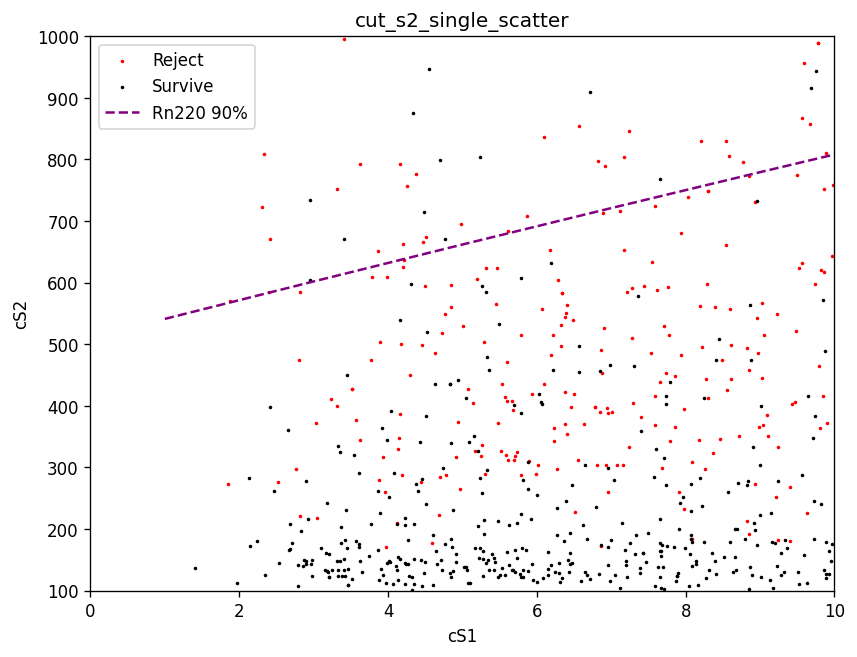

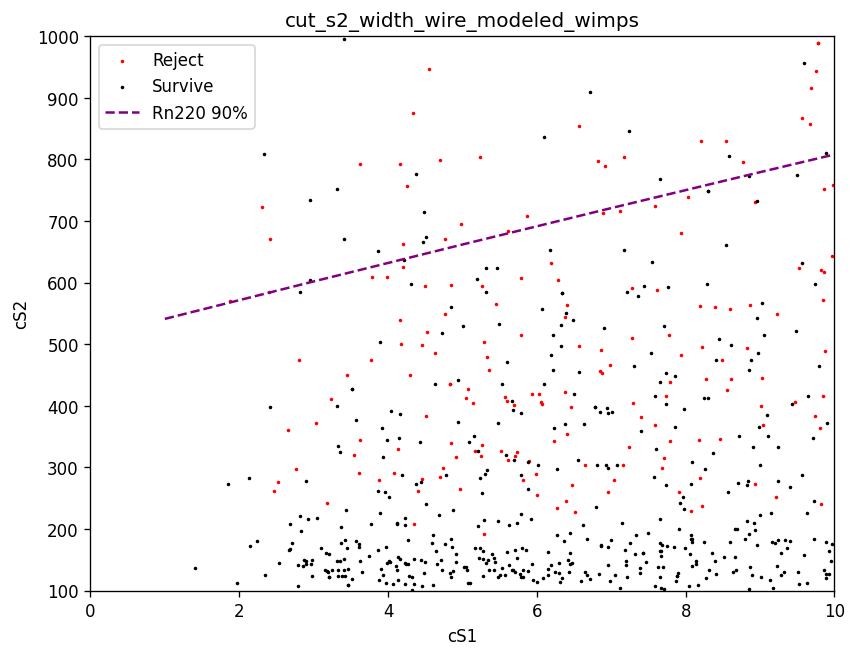

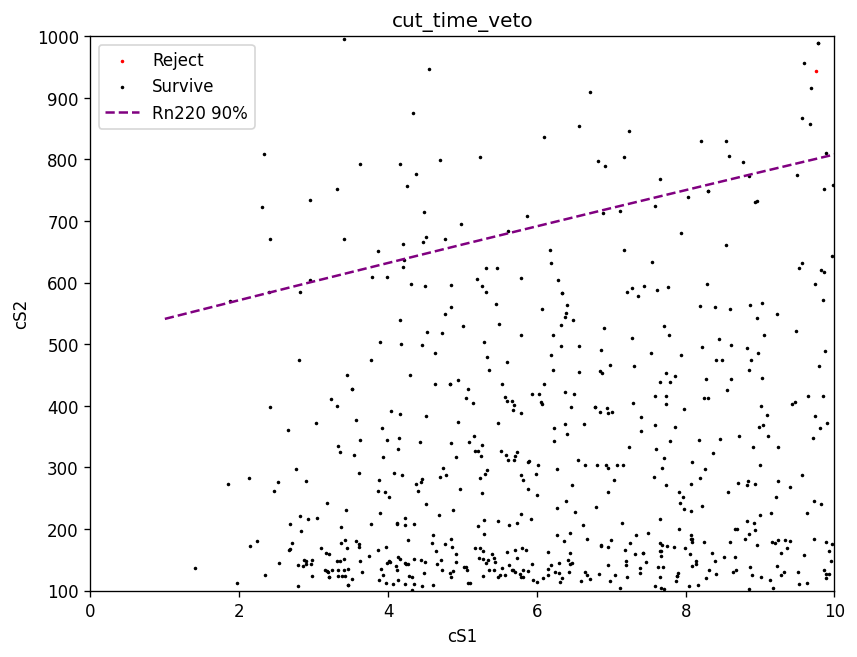

In [23]:
for cut in this:
    show_cut(data_loose,cut,alpha=1)

In [14]:
cut_acceptance(data_loose)

'^ Awesome table ^^^^^\n^ cut ^ n_pre ^ n_after ^ fraction ^ cumulative_fraction ^\n| cut_bdt_ac | 1822948 | 1530602 | 0.83963 | 0.83963 |\n| cut_cs2_area_fraction_top | 1530602 | 44256 | 0.02891 | 0.02428 |\n| cut_daq_veto | 44256 | 44079 | 0.996 | 0.02418 |\n| cut_fiducial_volume | 44079 | 44079 | 1.0 | 0.02418 |\n| cut_interaction_exists | 44079 | 44079 | 1.0 | 0.02418 |\n| cut_main_is_valid_triggering_peak | 44079 | 44076 | 0.99993 | 0.02418 |\n| cut_run_boundaries | 44076 | 44055 | 0.99952 | 0.02417 |\n| cut_s1_area_fraction_top | 44055 | 33549 | 0.76153 | 0.0184 |\n| cut_s1_max_pmt | 33549 | 33508 | 0.99878 | 0.01838 |\n| cut_s1_naive_bayes | 33508 | 33240 | 0.992 | 0.01823 |\n| cut_s1_pattern_bottom | 33240 | 32941 | 0.991 | 0.01807 |\n| cut_s1_pattern_top | 32941 | 32745 | 0.99405 | 0.01796 |\n| cut_s1_single_scatter | 32745 | 31503 | 0.96207 | 0.01728 |\n| cut_s1_tightcoin_3fold | 31503 | 31503 | 1.0 | 0.01728 |\n| cut_s1_width | 31503 | 31373 | 0.99587 | 0.01721 |\n| cut_s2_n